# STA130 Homework 04 

Please see the course [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) for the list of topics covered in this homework assignment, and a list of topics that might appear during ChatBot conversations which are "out of scope" for the purposes of this homework assignment (and hence can be safely ignored if encountered)

### Marking Rubric (which may award partial credit) 

- [0.1 points]: All relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] are reported within the notebook
- [0.2 points]: Evaluation of correctness and effectiveness of written communication for Question "1"
<!-- - [0.3 points]: Correctness of understanding confirmed by code comments and relevant ChatBot summaries [including link(s) to chat log histories if you're using ChatGPT] for Question "4" -->
- [0.3 points]: Evaluation of correctness and effectiveness of written communication for Question "6"
- [0.4 points]: Evaluation of submission for Question "8" 

Chat_log for question 1-3:https://chatgpt.com/share/66fa2d8b-15b4-8008-aaee-66e931532bd7 <br>
for question 4-5:https://chatgpt.com/share/66fce192-00bc-8008-9277-836d1a922047 <br>
for question 8: https://chatgpt.com/share/66fe1b7a-9b24-8008-ae76-2348d2c7c483

### 1. The "Pre-lecture" video (above) mentioned the "standard error of the mean" as being the "standard deviation" of the distribution bootstrapped means.  What is the difference between the "standard error of the mean" and the "standard deviation" of the original data? What distinct ideas do each of these capture? Explain this concisely in your own words.<br>


_**Standard deviation(SD)**_ is a property for one dataset, it can be the sample we select or the population. It describes how the individual datas distribute around the mean. This is a fixed value for a fixed dataset. A low SD value means the data points are close to the mean. <br>
_**Sample error of means(SEM)**_ focus on the sample selected from the whole population. It describes the difference between the sample mean and the polulation mean (can be seen as a measure for the accuracy of a sample). The SEM can be different for different samples. A lower SEM value means the sample mean is more accurate estimate for the population mean. 

**Trivial idea**<br>
So, overall, bootstrapping can simulate the process of sampling from the population. Therefore, we can derive some relationships between the sample and the population from the bootstrapped data’s distribution, such as the SEM. Then, we attribute the bias in the distribution to the issues inherent in the sample itself, which we refer to as the SEM. This should be a valid way to understand it, right...?

### 2. The "Pre-lecture" video (above) suggested that the "standard error of the mean" could be used to create a confidence interval, but didn't describe exactly how to do this.  How can we use the "standard error of the mean" to create a 95% confidence interval which "covers 95% of the bootstrapped sample means"? Explain this concisely in your own words.<br>


Before calculating, we need to clarify that the SEM of the sample and the SD of the histogram of the sample means obtained through bootstrapping are similar. The latter has a similar statistical significance to the former, and we can even say that these two quantities are equal. They both describe the variability of the data.<br>

So now we need to use the properties of the normal distribution. If the sample size is large, the sample mean will follow a normal distribution.<br>
To achieve a 95% confidence level, we need to ensure that our confidence interval contains 95% of the area under the distribution curve.<br>
Therefore, we need to set the boundaries of the confidence interval to be 1.96 standard deviations away from the mean (the axis of symmetry) to ensure that it covers 95% of the area.

### 3. Creating the "sample mean plus and minus about 2 times the standard error" confidence interval addressed in the previous problem should indeed cover approximately 95% of the bootstrapped sample means. Alternatively, how do we create a 95% bootstrapped confidence interval using the bootstrapped means (without using their standard deviation to estimate the standard error of the mean)? Explain this concisely in your own words.<br>


We can directly use the percentile to calculate the boundary of the confidence interval(CI)<br>
We still need to do bootstrapping first<br>
In order to involve 95% of the bootstrapped sample means, we can set the lower boundary at 2.5% percentile, and set the upper boundary at 97.5 percentile. This is related to the model of normal distribution.

### 4. The "Pre-lecture" video (above) mentioned that bootstrap confidence intervals could apply to other statistics of the sample, such as the "median". Work with a ChatBot to create code to produce a 95% bootstrap confidence interval for a population mean based on a sample that you have and comment the code to demonstrate how the code can be changed to produce a 95% bootstrap confidence interval for different population parameter (other than the population mean, such as the population median).<br>


In [3]:
#Means
import numpy as np #import a module

np.random.seed(42) #The seed makes sure that the random arrays summoned in each running are the same
sample_size = 100
sample = np.random.normal(loc=50, scale=10, size=sample_size) #(mean, SD, sample size)

bootstrap_means = []
n_bootstraps = 1000  

#bootstrap for 1000 times
for _ in range(n_bootstraps):
    #generate one bootstrap sanmple
    bootstrap_sample = np.random.choice(sample, size=sample_size, replace=True)
    #calculate the mean of the sample and append it to the list
    bootstrap_means.append(np.mean(bootstrap_sample))

ci_lower = np.percentile(bootstrap_means, 2.5)  #Use np.percentile() method to build the boundary of CI
ci_upper = np.percentile(bootstrap_means, 97.5)

(ci_lower, ci_upper)

(47.276635751407504, 50.62851486440195)

In [5]:
#Medians
import numpy as np

np.random.seed(42)
sample_size = 100
sample = np.random.normal(loc=50, scale=10, size=sample_size)

bootstrap_medians = []  #Change of the name to show we want to calculate the median
n_bootstraps = 1000

for _ in range(n_bootstraps):
    bootstrap_sample = np.random.choice(sample, size=sample_size, replace=True)
    bootstrap_medians.append(np.median(bootstrap_sample))  #np.median() to calculate the median of the sample

ci_lower = np.percentile(bootstrap_medians, 2.5)
ci_upper = np.percentile(bootstrap_medians, 97.5)

(ci_lower, ci_upper)

(46.94841964279748, 51.34222915269005)

### 5. The previous question addresses making a confidence interval for a population parameter based on a sample statistic. Why do we need to distinguish between the role of the popualation parameter and the sample sample statistic when it comes to confidence intervals? Explain this concisely in your own words.<br>


What we need to clarify is that we can only process data based on the selected sample. We cannot know the parameters of the population. In the example above, we only estimate the population parameters by bootstrapping the sample. Sample statistics fluctuate with different samples, while population parameters are fixed.

A confidence interval is a method we use to estimate the population parameters through sample statistics. The population parameter may fall within the confidence interval.

### 6. Provide written answers explaining the answers to the following questions in an informal manner of a conversation with a friend with little experience with statistics. <br>


No chatbot used in the section

_**6.1 The process of bootstrapping**_<br>
Now, we want to estimate the average weight of all Canadians. The problem is, you can't know the weight of every Canadian (this is like trying to measure the entire population), so you randomly find some Canadians and obtain their weight data. Now, the process of bootstrapping is like repeatedly drawing multiple samples with replacement from the weights you already have, and then calculating the average weight for each sample.

The specific steps of bootstrapping are as follows: you randomly draw from the original sample with replacement many times, each time drawing the same number of weight data as the original sample. Since sampling is done with replacement, the sampled data may repeat. Then, you calculate the average for each sample drawn, which gives you a set of different averages. Finally, you use these averages to estimate the average weight of all Canadians.

_**6.2 Main purpose of bootestrapping**_<br>
The main purpose of the bootstrap method is to help us estimate population parameters, such as the mean in the case, especially when we cannot directly measure the population (usually we cannot) . It **simulates** the process of repeatedly sampling from the population by repeatedly sampling from the sample. In this way, even if we only have one sample, we can still make estimates about the characteristics of the population and have a rough understanding of the reliability of this estimate.

_**6.3**_<br>
Then we measure the weight of n people in the street<br>
**1.** Calculate the avergae weight of the n(e.g. 100) people, this will be our initial guess. e.g.80kg<br>
**2.** Resample with bootstrapping. As we mentioned in 6.1, we can use computer to help us randomly select 100 people's weight with replacement from the sample we have. This process can be repeated for many times, for example 10000 times<br>
**3.** Calculate the mean weight(bootstrapped mean) for the sample we randomly picked and put them into a histogram (or bar plot)<br>
**4.** Check if our initial guess is close to the bootstrapped mean in a high frequency. If so, the guess could be plausible


### 7. The "Pre-lecture" video (above) introduced hypothesis testing by saying that "the confidence interval covers zero, so we cannot reject the hypothesis that the drug is **[on average]** not doing anything".  This conclusion could be referred to as "failing to reject the null hypothesis", where the term "null" refers to the concept of "no effect **[on average]**".  Why does a confidence interval overlapping zero "fail to reject the null hypothesis" when the observed sample mean statistic itself is not zero? Alternatively, what would lead to the opposite conclusion in this context; namely, instead choosing "to reject the null hypothesis"? Explain the answers to these questions concisely in your own words.<br>


**1.** The CI includes a large range of values which is plausible, all of those values can be the real population mean. Since 0 falls in the CI, 0 is plausible. We do not have enough evidence to oppose the null hypothesis.<br>
**2.** Thus, if 0 is not in the CI, the null hypothesis can be opposed, because that means the bootstrapped mean is unlikely to be 0.

### 8. Complete the following assignment. 


### Vaccine Data Analysis Assignment

**Overview**

The company AliTech has created a new vaccine that aims to improve the health of the people who take it. Your job is to use what you have learned in the course to give evidence for whether or not the vaccine is effective. 

**Data**
AliTech has released the following data.

```csv
PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
1,45,M,84,86
2,34,F,78,86
3,29,M,83,80
4,52,F,81,86
5,37,M,81,84
6,41,F,80,86
7,33,M,79,86
8,48,F,85,82
9,26,M,76,83
10,39,F,83,84
```

**Deliverables**
While you can choose how to approach this project, the most obvious path would be to use bootstrapping, follow the analysis presented in the "Pre-lecture" HW video (above). Nonetheless, we are  primarily interested in evaluating your report relative to the following deliverables.

- A visual presentation giving some initial insight into the comparison of interest.
- A quantitative analysis of the data and an explanation of the method and purpose of this method.
- A conclusion regarding a null hypothesis of "no effect" after analyzing the data with your methodology.
- The clarity of your documentation, code, and written report. 

> Consider organizing your report within the following outline template.
> - Problem Introduction 
>     - An explaination of the meaning of a Null Hypothesis of "no effect" in this context
>     - Data Visualization (motivating and illustrating the comparison of interest)
> - Quantitative Analysis
>     - Methodology Code and Explanations
>     - Supporting Visualizations
> - Findings and Discussion
>     - Conclusion regarding a Null Hypothesis of "no effect"
>     - Further Considerations

**Further Instructions**
- When using random functions, you should make your analysis reproducible by using the `np.random.seed()` function
- Create a CSV file and read that file in with your code, but **do not** include the CSV file along with your submission


_**Problem Introduction**_

The meaning of a "Null Hypothesis of 'no effect'" means that the distribution of (change in health score after taking the vaccine) should be centred near zero. To check if the null hypothesis is correct, I'll try to use a bar plot and box plot to visuallize if there is a positive trend of healthscore.

In [2]:
import pandas as pd
datas = {
    'PatientID' :[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Age' : [45, 34, 29, 52, 37, 41, 33, 48, 26, 39],
    'Gender' : ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M','F'],
    'InitialHealthScore' : [84, 78, 83, 81, 81, 80, 79, 85, 76, 83],
    'FinalHealthScore' :[86, 86, 80, 86, 84, 86, 86, 82, 83, 84],
    
}

df = pd.DataFrame(datas)

df.to_csv('vaccine_data.csv')

In [3]:
data = pd.read_csv('vaccine_data.csv')
data

,Unnamed: 0,PatientID,Age,Gender,InitialHealthScore,FinalHealthScore
0,0,1,45,M,84,86
1,1,2,34,F,78,86
2,2,3,29,M,83,80
3,3,4,52,F,81,86
4,4,5,37,M,81,84
5,5,6,41,F,80,86
6,6,7,33,M,79,86
7,7,8,48,F,85,82
8,8,9,26,M,76,83
9,9,10,39,F,83,84


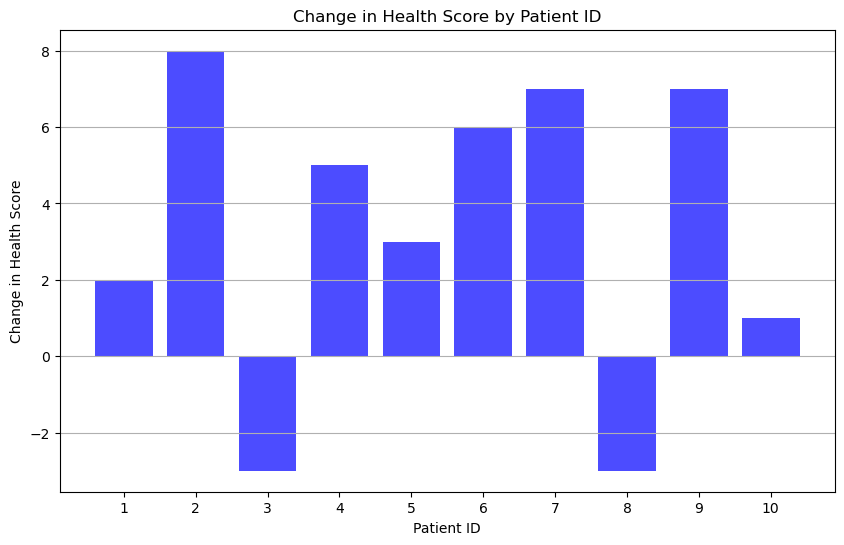

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

# Plotting the bar plot
plt.figure(figsize=(10, 6))
plt.bar(df['PatientID'], df['HealthScoreChange'], color='blue', alpha=0.7)
plt.xlabel('Patient ID')
plt.ylabel('Change in Health Score')
plt.title('Change in Health Score by Patient ID')
plt.xticks(df['PatientID'])
plt.grid(axis='y')

# Display the plot
plt.show()

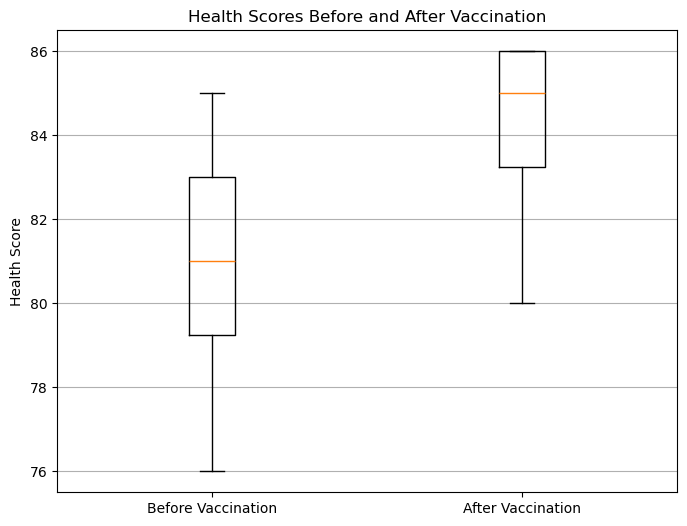

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data)

# Prepare data for box plots
data_to_plot = [df['InitialHealthScore'], df['FinalHealthScore']]

# Plotting the box plots
plt.figure(figsize=(8, 6))
plt.boxplot(data_to_plot, labels=['Before Vaccination', 'After Vaccination'])
plt.ylabel('Health Score')
plt.title('Health Scores Before and After Vaccination')
plt.grid(axis='y')

# Display the plot
plt.show()

_**Quantitative Analysis**_<br>
In this section, I will try to bootstrap the sample, then we can get an estimation of population mean of change of HealthScore. This may provide evidence related to our null hypothesis.

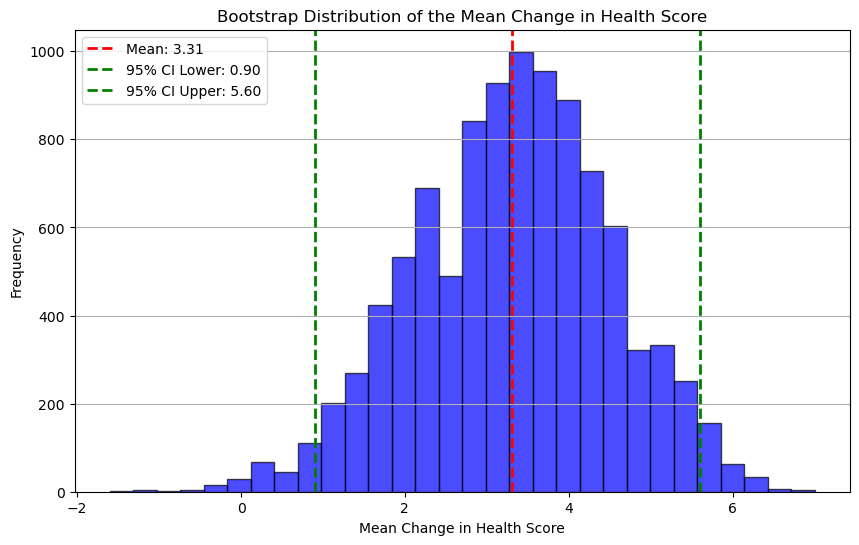

0.005


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Create a DataFrame
df = pd.DataFrame(data)

# Calculate the change in health score
df['HealthScoreChange'] = df['FinalHealthScore'] - df['InitialHealthScore']

np.random.seed(42)

# Bootstrapping
n_iterations = 10000  # Number of bootstrap samples
bootstrap_means = []

for _ in range(n_iterations):
    # Resample with replacement
    sample = np.random.choice(df['HealthScoreChange'], size=len(df['HealthScoreChange']), replace=True)
    # Calculate the mean of the sample
    bootstrap_means.append(np.mean(sample))

# Calculate the mean of the bootstrapped samples
mean_bootstrap = np.mean(bootstrap_means)

# Calculate the 95% confidence interval (2.5th and 97.5th percentiles)
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Calculate the p-value: proportion of bootstrap samples where the mean is less than or equal to zero
p_value = np.sum(np.array(bootstrap_means) <= 0) / n_iterations

# Plot the bootstrap means
plt.figure(figsize=(10, 6))
plt.hist(bootstrap_means, bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel('Mean Change in Health Score')
plt.ylabel('Frequency')
plt.title('Bootstrap Distribution of the Mean Change in Health Score')
plt.grid(axis='y')

# Add vertical lines for the mean and confidence interval
plt.axvline(mean_bootstrap, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_bootstrap:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', linewidth=2, label=f'95% CI Lower: {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', linewidth=2, label=f'95% CI Upper: {upper_bound:.2f}')

# Add legend
plt.legend()

# Display the plot
plt.show()

print(p_value)

Bootstrapped mean: 3.29<br>

_**Findings and Discussion**_

Since 0 is not within the CI, the null hypothesis can be opposed. The vaccine takes positive effect on human.

### 9. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?<br>
    
<details class="details-example"><summary style="color:blue"><u>Further Guidance</u></summary>
    
>  Here is the link of [wiki-textbook](https://github.com/pointOfive/stat130chat130/wiki) in case it gets lost among all the information you need to keep track of  : )
> 
> Just answering "Yes" or "No" or "Somewhat" or "Mostly" or whatever here is fine as this question isn't a part of the rubric; but, the midterm and final exams may ask questions that are based on the tutorial and lecture materials; and, your own skills will be limited by your familiarity with these materials (which will determine your ability to actually do actual things effectively with these skills... like the course project...)

</details>

_**Don't forget to ask for summaries of your ChatBot session(s) and paste these into your homework notebook (including link(s) to chat log histories if you're using ChatGPT)!**_

No, I am still working on it